In [9]:
import pandas as pd

In [10]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [11]:
df.shape

(13320, 9)

In [12]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [13]:
df1=df.drop(["society"],axis="columns")

In [14]:
df2=df1.dropna()

In [15]:
df2.isna().any()

area_type       False
availability    False
location        False
size            False
total_sqft      False
bath            False
balcony         False
price           False
dtype: bool

In [16]:
df2.shape

(12710, 8)

In [17]:
df2.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


In [18]:
df2["bhk"]=df2["size"].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-18-6b00e86adef2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bhk"]=df2["size"].apply(lambda x: int(x.split(' ')[0]))


In [19]:
df2.head(3)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3


In [20]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def set_total_sqft(x):
    x=str(x)
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
df2["total_sqft"]=df2["total_sqft"].apply(set_total_sqft)

<ipython-input-22-a15972206992>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["total_sqft"]=df2["total_sqft"].apply(set_total_sqft)


In [23]:
df2.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [24]:
def set_float(x):
    try:
         float(x)
    except:
        return False
    return True

In [27]:




len(df2[~(df2["total_sqft"].apply(set_float))])

0

In [28]:
df2.head(3)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3


In [29]:
df3=df2.drop(["availability"],axis="columns")

In [30]:
df3.isna().any()

area_type     False
location      False
size          False
total_sqft     True
bath          False
balcony       False
price         False
bhk           False
dtype: bool

In [31]:
df3.shape

(12710, 8)

In [32]:
df3.head(3)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3


In [33]:
##df3[df3["total_sqft"]/df3["bhk"]<300]

In [34]:
location_stat=df3.groupby("location")["location"].agg("count").sort_values(ascending=False)

In [35]:
location_less_than_ten=location_stat[location_stat<=10]

In [36]:
df3["location"]=df3["location"].apply(lambda x:"other" if x in location_less_than_ten else x)

In [37]:
df3.groupby("location")["location"].agg("count").sort_values(ascending=False)

location
other               2754
Whitefield           514
Sarjapur  Road       372
Electronic City      300
Kanakpura Road       261
                    ... 
Karuna Nagar          11
Narayanapura          11
Tindlu                11
Thyagaraja Nagar      11
ISRO Layout           11
Name: location, Length: 238, dtype: int64

In [38]:
df3.head(3)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3


In [39]:
df3["price_per_sqft"]=(df3["price"]*100000)/df3["total_sqft"]

In [40]:
df3.head(3)

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556


In [41]:
df3["bhk"].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [42]:
df4=df3[df3["total_sqft"]/df3["bhk"]>300]

In [43]:
df4.shape

(11847, 9)

In [44]:
df4.head(2)

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615


In [45]:
df5=df4[df4["bath"]<df4["bhk"]+2]

In [46]:


df5.shape

(11724, 9)

In [47]:
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [48]:
df5.price_per_sqft.describe()

count     11724.000000
mean       6078.104532
std        3848.330733
min         267.829813
25%        4177.777778
50%        5208.333333
75%        6706.635528
max      176470.588235
Name: price_per_sqft, dtype: float64

In [49]:
df6=df5.drop(["area_type"],axis="columns")

In [50]:
df6.head()
import numpy as np

In [51]:
def removeol(df):
    out_df=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>=(m-st)) & (subdf.price_per_sqft<=(m+st))]
        out_df=pd.concat([out_df,reduced_df],ignore_index=True)
    return out_df

In [52]:

df7=removeol(df6)

In [53]:
df7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,3.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509


In [54]:
df7.isna().any()

location          False
size              False
total_sqft        False
bath              False
balcony           False
price             False
bhk               False
price_per_sqft    False
dtype: bool

In [55]:
final=df7

In [56]:
final.isna().any()

location          False
size              False
total_sqft        False
bath              False
balcony           False
price             False
bhk               False
price_per_sqft    False
dtype: bool

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le=LabelEncoder()

In [59]:
final.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,3.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509


In [60]:
new_final=df7

In [61]:
new_final.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,3.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509


In [62]:
new_final.groupby("location")["location"].agg("count")
import matplotlib.pyplot as plt


In [63]:
df7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,3.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509


In [64]:
final=df7

In [65]:
final.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,3.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509


In [66]:
def plots(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    
    plt.scatter(bhk2.price_per_sqft,bhk2.total_sqft,marker="*",color="blue",label="bhk2",s=50)
    plt.scatter(bhk3.price_per_sqft,bhk3.total_sqft,marker="+",color="red",label="bhk3",s=50)
    plt.xlabel("price per sq ft")
    plt.ylabel("total price")
   
    plt.legend()

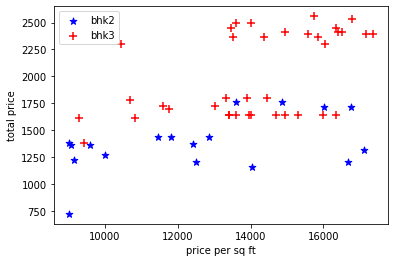

In [67]:
plots(final,'Rajaji Nagar')
new_final=final.drop(["size"],axis=1)

In [68]:
def remove_ol_bhk(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std' :np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[(bhk_df.price_per_sqft<(stats["mean"]))].index.values)
    return df.drop(exclude_indices,axis='index')

In [69]:
cfinal=remove_ol_bhk(new_final)

In [70]:
new_final.head(2)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.0
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.0


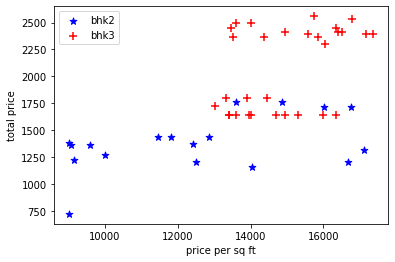

In [71]:
plots(cfinal,'Rajaji Nagar')

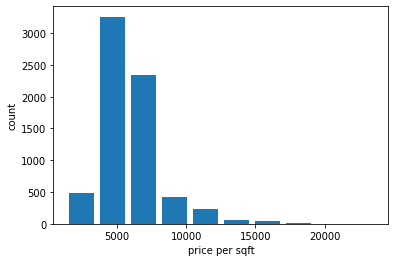

In [72]:
plt.hist(cfinal.price_per_sqft,rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel('count')
plt.show()

In [73]:
cfinal.shape

(6854, 7)

In [74]:
cfinal.head(3)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419


In [75]:
n_final=cfinal.drop(["price_per_sqft","balcony"],axis="columns")

In [76]:
n_final.head(2)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2


In [77]:
dummies=pd.get_dummies(n_final.location)

In [78]:
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
last_df=pd.concat([n_final,dummies],axis="columns")

In [80]:
last_df.head(2)

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
last_df=last_df.drop(["location"],axis=1)

In [82]:
last_df.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
last_df.shape

(6854, 242)

In [84]:
x=last_df.drop(["price"],axis="columns")

In [85]:
y=last_df.price

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [88]:
x_train.shape

(5483, 241)

In [89]:
x_test.shape

(1371, 241)

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lr=LinearRegression()

In [92]:
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
lr.score(x_test,y_test)

0.8722899359186321

In [94]:
pred=lr.predict(x_test)

In [95]:
from sklearn.model_selection import ShuffleSplit

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [98]:
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.78369207, 0.85811599, 0.84859631, 0.86830029, 0.78968012])

In [99]:
from sklearn.linear_model import Lasso

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [111]:
def find_best_model_using_gridsearchcv(x,y):
    algos={
        'LinearRegression':{
        'model':LinearRegression(),
        'params':{
            'normalize':[True,False]
        }
    },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'DecisionTreeRegressor':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [112]:

find_best_model_using_gridsearchcv(x,y)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

,model,best_score,best_params
0,LinearRegression,0.829677,{'normalize': False}
1,lasso,0.729850,"{'alpha': 1, 'selection': 'random'}"
2,DecisionTreeRegressor,0.767272,"{'criterion': 'mse', 'splitter': 'random'}"


In [138]:
np.where(x.columns=='6th Phase JP Nagar')[0][0]

9

In [139]:
len(x.columns)

243

In [142]:
x=last_df.drop(["price"],axis="columns")
y=last_df.price

In [143]:
x.shape

(6854, 241)

In [144]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    xa=np.zeros(len(x.columns))
    xa[0]=sqft
    xa[1]=bath
    xa[2]=bhk
    if loc_index>=0:
        xa[loc_index]=1
    return lr.predict([xa])[0]

In [145]:
predict_price('2nd Phase Judicial Layout',1200.0,2,2)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.73084255344577